This Jupyter Notebook is meant to be accessed via Google Colab and will be the main method to train models on Google Colab.

In [1]:
# primary importing code block to utilize the python files
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydub import AudioSegment   # main class from pydub package used to upload mp3 into Python and then get a NumPy array
import IPython.display as ipd    # ability to play audio in Jupyter Notebooks if needed
import librosa as lb             # loads the librosa package
import librosa.display
from src.configs import *
from src.utils import MusicAlignedTab, create_FullSetMAT
from src.dataset import *

In [2]:
mat = MusicAlignedTab('mookies_last_christmas')
df = mat.MAT

C:\ProgramData\Anaconda3\lib\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


All the following prints are from combine_tab_and_song function:
first drum note row = 0
# of song slices post fdn = 2106
# of song slices pre fdn = 4
Produced number of song slices = 2110
Expected number of song slices (should be same for non-triplet songs) = 2110.8610612244897
tab length = 1936     datatype: <class 'int'>
len(song_slices_tab_indexed) = 1936     datatype of object: <class 'list'>
song_slices_tab_indexed[0].shape = (3445, 2)     datatype of [0]: <class 'numpy.ndarray'>
np.array(song_slices_tab_indexed).shape = (1936,)
len(sample_start_list) = 1936


In [3]:
S = create_spectrogram(mat.filepaths['song'])

create_spectrogram: lb_song.shape = (2, 7272576)
create_spectrogram: sr = 44100
create_spectrogram: lb_mono.shape = (7272576,)
create_spectrogram: mono_S.shape = (150, 16487)
create_spectrogram: mono_S.shape after ftd = (150, 16487)
create_spectrogram: L_S.shape after ftd = (150, 16487)
create_spectrogram: R_S.shape after ftd = (150, 16487)
create_spectrogram: spectrogram.shape after ftd = (150, 16487, 3)


In [4]:
df = clean_labels(df)
MusicAlignedTab.labels_summary(df)
df = collapse_class(df, keep_dynamics = False, keep_bells = False, keep_toms_separate = False, hihat_classes=1, cymbal_classes=1)
MusicAlignedTab.labels_summary(df)

---dataframe.describe() without blank_chars---
          tk   BD   SD   HH  RD   CC C2  LT  MT  HT
count   1936  455  227  217  58  198  3  50  59  75
unique     7    1    2    3   2    2  1   1   1   1
top        +    o    o    x   x    x  x   o   o   o
freq     484  455  225  170  49  196  3  50  59  75

---Unique values and frequencies by column name---
      +    a    e    2    1    3    4
tk  484  484  484  121  121  121  121

       -    o
BD  1481  455

       -    o  O
SD  1709  225  2

       -    x   o  X
HH  1719  170  45  2

       -   x  b
RD  1878  49  9

       -    x  X
CC  1738  196  2

       -  x
C2  1933  3

       -   o
LT  1886  50

       -   o
MT  1877  59

       -   o
HT  1861  75

---dataframe.describe() without blank_chars---
         tk   BD   SD   HH   at   ac
count   484  455  227  170  166  297
unique    2    1    1    1    1    1
top       c    o    o    x    o    x
freq    363  455  227  170  166  297

---Unique values and frequencies by column name---

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\missing.py:49: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


In [5]:
encode_df = one_hot_encode(df)
print(encode_df.columns)
encode_df.head()

one_hot_encode: col_list = ['tk', 'BD', 'SD', 'HH', 'at', 'ac']
Index(['song slice', 'sample start', 'tk_beat', 'tk_downbeat', 'BD_o', 'SD_o',
       'HH_x', 'at_o', 'ac_x'],
      dtype='object')


song slice  sample start  tk_beat  \
0  [[0.05392456, 0.070617676], [0.051116943, 0.06...         15611        1   
1  [[0.19418335, 0.21206665], [0.23873901, 0.2072...         19056        0   
2  [[-0.19116211, -0.15524292], [-0.071380615, -0...         22501        0   
3  [[-0.009857178, -0.09375], [0.03488159, -0.126...         25946        0   
4  [[0.043182373, 0.111968994], [0.050994873, 0.1...         29391        1   

   tk_downbeat  BD_o  SD_o  HH_x  at_o  ac_x  
0            1     1     0     0     0     1  
1            0     0     0     0     0     0  
2            0     0     0     1     0     0  
3            0     0     0     0     0     0  
4            0     0     0     1     0     0

In [6]:
%time targets, target_dict = create_targets(S, encode_df)

Wall time: 1.54 s


In [7]:
for idx, val in target_dict.items():
    print(f'total windows that {val} are labeled 1 = {np.count_nonzero(targets[idx,:,0])}')
print(f'total windows = {targets.shape[1]}')

total windows that tk_beat are labeled 1 = 913
total windows that tk_downbeat are labeled 1 = 240
total windows that BD_o are labeled 1 = 827
total windows that SD_o are labeled 1 = 443
total windows that HH_x are labeled 1 = 319
total windows that at_o are labeled 1 = 299
total windows that ac_x are labeled 1 = 567
total windows = 16487


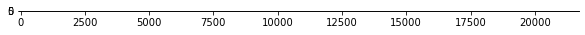

In [43]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()
plt.imshow(targets[:,:,1])
plt.show()

In [22]:
MusicAlignedTab.labels_summary(encode_df)

---Unique values and frequencies by column name---
            0    1
tk_beat  1452  484

                0    1
tk_downbeat  1815  121

         0    1
BD_o  1481  455

         0    1
SD_o  1709  227

         0    1
HH_x  1766  170

         0    1
at_o  1770  166

         0    1
ac_x  1639  297



In [38]:
targets = np.zeros((7, 10, 3), dtype=int)
print(targets.shape)
targets[:, 0, :]

(7, 10, 3)


array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [19]:
df.drop(columns = ['song slice', 'sample start'])[df.drop(columns = ['song slice', 'sample start']) != '-'].describe()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


tk_beat  tk_downbeat
count  1478.000000  1478.000000
mean      0.248985     0.062246
std       0.432572     0.241684
min       0.000000     0.000000
25%       0.000000     0.000000
50%       0.000000     0.000000
75%       0.000000     0.000000
max       1.000000     1.000000

In [ ]:
mat.random_alignment_checker(['BD', 'SD', 'CC'], 14)

<AxesSubplot:xlabel='Time', ylabel='Hz'>

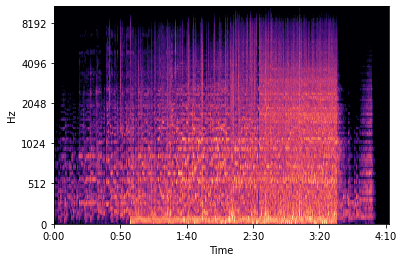

In [5]:
librosa.display.specshow(S[:,:,0], sr=44100, x_axis='time', y_axis = 'mel')

In [8]:
FullSet = create_FullSetMAT(SONGS_PATH)

subdirs = ['C:/Users/Thomas/Python Projects/Drum-Tabber-Support-Data/Songs\\ancient_tombs', 'C:/Users/Thomas/Python Projects/Drum-Tabber-Support-Data/Songs\\best_of_me', 'C:/Users/Thomas/Python Projects/Drum-Tabber-Support-Data/Songs\\boulevard_of_broken_dreams', 'C:/Users/Thomas/Python Projects/Drum-Tabber-Support-Data/Songs\\cant_be_saved', 'C:/Users/Thomas/Python Projects/Drum-Tabber-Support-Data/Songs\\face_down', 'C:/Users/Thomas/Python Projects/Drum-Tabber-Support-Data/Songs\\family_tradition', 'C:/Users/Thomas/Python Projects/Drum-Tabber-Support-Data/Songs\\fireworks_at_dawn', 'C:/Users/Thomas/Python Projects/Drum-Tabber-Support-Data/Songs\\forever_at_last', 'C:/Users/Thomas/Python Projects/Drum-Tabber-Support-Data/Songs\\four_years', 'C:/Users/Thomas/Python Projects/Drum-Tabber-Support-Data/Songs\\garden_state', 'C:/Users/Thomas/Python Projects/Drum-Tabber-Support-Data/Songs\\gunpowder', 'C:/Users/Thomas/Python Projects/Drum-Tabber-Support-Data/Songs\\hair_of_the_dog', 'C:/User

C:\ProgramData\Anaconda3\lib\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


All the following prints are from combine_tab_and_song function:
first drum note row = 0
# of song slices post fdn = 3062
# of song slices pre fdn = 3
Produced number of song slices = 3065
Expected number of song slices (should be same for non-triplet songs) = 3068.207528344671
tab length = 2882     datatype: <class 'int'>
len(song_slices_tab_indexed) = 2882     datatype of object: <class 'list'>
song_slices_tab_indexed[0].shape = (3392, 2)     datatype of [0]: <class 'numpy.ndarray'>
np.array(song_slices_tab_indexed).shape = (2882,)
len(sample_start_list) = 2882
All the following prints are from combine_tab_and_song function:
first drum note row = 56
# of song slices post fdn = 1680
# of song slices pre fdn = 162
Produced number of song slices = 1842
Expected number of song slices (should be same for non-triplet songs) = 1842.9039455782313
tab length = 1628     datatype: <class 'int'>
len(song_slices_tab_indexed) = 1628     datatype of object: <class 'list'>
song_slices_tab_indexed[0]

All the following prints are from combine_tab_and_song function:
first drum note row = 0
# of song slices post fdn = 3860
# of song slices pre fdn = 0
Produced number of song slices = 3860
Expected number of song slices (should be same for non-triplet songs) = 3859.859026455026
tab length = 3792     datatype: <class 'int'>
len(song_slices_tab_indexed) = 3792     datatype of object: <class 'list'>
song_slices_tab_indexed[0].shape = (3634, 2)     datatype of [0]: <class 'numpy.ndarray'>
np.array(song_slices_tab_indexed).shape = (3792,)
len(sample_start_list) = 3792
All the following prints are from combine_tab_and_song function:
first drum note row = 0
# of song slices post fdn = 1863
# of song slices pre fdn = 1
Produced number of song slices = 1864
Expected number of song slices (should be same for non-triplet songs) = 1865.376
tab length = 1826     datatype: <class 'int'>
len(song_slices_tab_indexed) = 1826     datatype of object: <class 'list'>
song_slices_tab_indexed[0].shape = (612

In [9]:
FullSet_clean = clean_labels(FullSet)
MusicAlignedTab.labels_summary(FullSet_clean)
FullSet_collapse = collapse_class(FullSet_clean, keep_dynamics = False, keep_bells = False, keep_toms_separate = False, hihat_classes=1, cymbal_classes=1)
MusicAlignedTab.labels_summary(FullSet_collapse)

---dataframe.describe() without blank_chars---
           tk     BD    SD    HH    RD    CC    C2   LT   MT   HT  CH   C3  SC
count   49917  11829  7551  5351  1718  3275  2331  994  391  298  97  290  26
unique      9      2     3     4     4     3     3    2    2    2   3    2   2
top         +      o     o     x     x     X     X    o    o    o   X    X   X
freq    12461  11399  6752  2907  1104  2016  1891  916  334  262  81  264  20

---Unique values and frequencies by column name---
        +      e      a     1     2     3     4   t   s
tk  12461  12459  12446  3206  3202  3199  2867  47  30

        -      o    O
BD  38088  11399  430

        -     o    g    O
SD  42366  6752  527  272

        -     x     X    o   g
HH  44566  2907  2188  230  26

        -     x    X    b   g
RD  48199  1104  476  113  25

        -     X     x  b
CC  46642  2016  1252  7

        -     X    x  b
C2  47586  1891  439  1

        -    o   O
LT  48923  916  78

        -    o   O
MT  49526  33

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\missing.py:49: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


---dataframe.describe() without blank_chars---
           tk     BD    SD    HH    at    ac
count   12474  11829  7024  2907  1540  9801
unique      2      1     1     1     1     1
top         c      o     o     x     o     x
freq     9268  11829  7024  2907  1540  9801

---Unique values and frequencies by column name---
        -     c     C
tk  37443  9268  3206

        -      o
BD  38088  11829

        -     o
SD  42893  7024

        -     x
HH  47010  2907

        -     o
at  48377  1540

        -     x
ac  40116  9801



In [10]:
FullSet_collapse.columns

Index(['tk', 'BD', 'SD', 'HH', 'song slice', 'sample start', 'at', 'ac'], dtype='object')

In [20]:
FullSet_collapse.loc['ancient_tombs']

tk BD SD HH                                         song slice  \
0     c  -  o  -  [[-0.016845703, -0.028961182], [-0.008728027, ...   
1     -  -  -  -  [[0.023498535, -0.2736206], [-0.022735596, -0....   
2     -  -  -  -  [[-0.19168091, -0.36132812], [-0.19781494, -0....   
3     -  -  -  -  [[-0.0107421875, -0.27114868], [-0.0056152344,...   
4     C  o  -  -  [[0.37442017, 0.3838501], [0.3551941, 0.291137...   
...  .. .. .. ..                                                ...   
2877  -  -  -  -  [[-0.7868042, -0.35656738], [-0.80999756, -0.4...   
2878  c  -  -  -  [[0.12173462, 0.5961914], [0.05532837, 0.50918...   
2879  -  -  -  -  [[-0.004425049, 0.26940918], [-0.0069885254, 0...   
2880  -  -  -  -  [[-0.42492676, -0.127594], [-0.46951294, -0.21...   
2881  -  -  -  -  [[0.65893555, 0.7157593], [0.636261, 0.6703491...   

      sample start at ac  
0            11377  o  -  
1            14769  -  -  
2            18161  -  -  
3            21553  -  -  
4            24945  -  x  
...            ... .. ..  
2877       9777623  -  -  
2878       9781015  -  -  
2879       9784407  -  -  
2880       9787799  -  -  
2881       9791191  -  -  

[2882 rows x 8 columns]

In [21]:
FullSet_encoded = one_hot_encode(FullSet_collapse)

one_hot_encode: col_list = ['tk', 'BD', 'SD', 'HH', 'at', 'ac']


In [24]:
FullSet_encoded.head()

song slice  \
ancient_tombs 0  [[-0.016845703, -0.028961182], [-0.008728027, ...   
              1  [[0.023498535, -0.2736206], [-0.022735596, -0....   
              2  [[-0.19168091, -0.36132812], [-0.19781494, -0....   
              3  [[-0.0107421875, -0.27114868], [-0.0056152344,...   
              4  [[0.37442017, 0.3838501], [0.3551941, 0.291137...   

                 sample start  tk_beat  tk_downbeat  BD_o  SD_o  HH_x  at_o  \
ancient_tombs 0         11377        1            0     0     1     0     1   
              1         14769        0            0     0     0     0     0   
              2         18161        0            0     0     0     0     0   
              3         21553        0            0     0     0     0     0   
              4         24945        1            1     1     0     0     0   

                 ac_x  
ancient_tombs 0     0  
              1     0  
              2     0  
              3     0  
              4     1

In [26]:
SONGS_PATH

'C:/Users/Thomas/Python Projects/Drum-Tabber-Support-Data/Songs'

In [37]:
[x.name for x in os.scandir(SONGS_PATH) if x.is_dir() and x.name in VAL_SONG_LIST]

['four_years', 'misery_business']

In [33]:
VAL_SONG_LIST = ['misery_business', 'four_years']